In [38]:
from nolitsa import delay, dimension
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


ModuleNotFoundError: No module named 'gtda'

In [10]:
lorenze_df = pd.read_csv('../data/lorenze_attractor.csv', index_col=0)

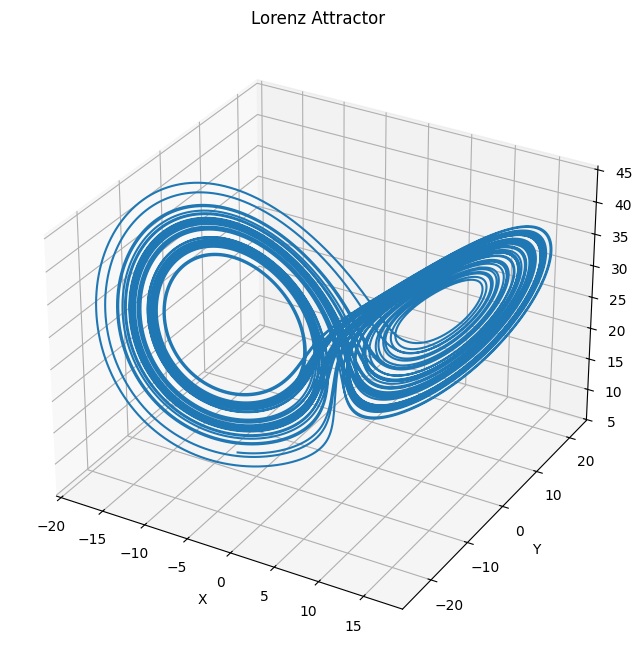

In [11]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(lorenze_df['X'], lorenze_df['Y'], lorenze_df['Z'])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')
plt.show()

In [12]:
maxtau = 1000
tau_search = np.arange(maxtau)
i = delay.dmi(lorenze_df['X'], maxtau=maxtau)

In [13]:
np.where(np.diff(i) > 0)

(array([627, 629, 632, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643,
        644, 645, 647, 654, 655, 656, 657, 658, 659, 660, 662, 664, 665,
        666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678,
        679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691,
        692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704,
        705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717,
        718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730,
        731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743,
        744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756,
        757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769,
        770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782,
        783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795,
        796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808,
        809, 810, 811, 812, 813, 814, 815, 816, 817

In [14]:
tau = np.where(np.diff(i) > 0)[0][0]
print(f"için Önerilen Tau (AMI): {tau}")

için Önerilen Tau (AMI): 627


In [15]:
dim = np.arange(1, 10)

In [16]:
f1, f2, f3 = dimension.fnn(lorenze_df['X'], tau=tau, dim=dim, window=10)

# f1, false nearest neighbors oranını temsil eder. 
# Genellikle %1'in (0.01) altına düştüğü ilk 'm' değeri seçilir.
m = np.where(f1 < 0.01)[0][0] + 1
print(f"Önerilen Gömme Boyutu (m): {m}")

Önerilen Gömme Boyutu (m): 3


In [67]:
def plot_chaos_parameters(name, signal, tau_search, ami_values, threshold, tau_opt, dims, fnn_values, m_opt):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'{name} - Kaos Analizi Parametre Seçimi', fontsize=16)

    # --- 1. AMI Plot ---
    # ACF tarzı yatay eşik çizgisi
    ax1.axhline(y=threshold, color='green', linestyle='--', label='1/e Eşiği (Traditional)')


    # Eğer R 14 sonucunu verdiyse, o noktayı işaretleyelim
    ax1.axvline(x=tau_opt, color='r', linestyle='--', label=f'Belirlenen Tau {tau_opt}')
    ax1.plot(tau_search, ami_values, 'b-', linewidth=2, label='AMI Değeri')
    ax1.plot(tau_opt, ami_values[tau_opt], 'ro', markersize=8, label=f'Optimal Tau = {tau_opt}')
    ax1.set_title('Average Mutual Information (Gecikme Seçimi)')
    ax1.set_xlabel('Gecikme (Tau)')
    ax1.set_ylabel('Karşılıklı Bilgi (AMI)')
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.7)

    # --- 2. FNN Plot ---
    ax2.plot(dims, fnn_values * 100, 'go-', linewidth=2, label='FNN Oranı')
    ax2.axhline(y=1, color='r', linestyle=':', label='%1 Eşiği')
    ax2.plot(m_opt, fnn_values[m_opt-1] * 100, 'rs', markersize=8, label=f'Optimal m = {m_opt}')
    ax2.set_title('False Nearest Neighbors (Boyut Seçimi)')
    ax2.set_xlabel('Boyut (m)')
    ax2.set_ylabel('Yalancı Komşu Oranı (%)')
    ax2.set_yscale('log') # Küçük değerleri görmek için logaritmik ölçek
    ax2.legend()
    ax2.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


In [64]:
signals = {"X": lorenze_df['X'],
              "Y": lorenze_df['Y'],
              "Z": lorenze_df['Z']} 

X için Önerilen Tau (AMI): 335
X İçin Hesaplanan Optimal Boyut (m): 3
FNN Oranları (f1): [0.9996 0.1032 0.     0.     0.     0.     0.     0.     0.    ]


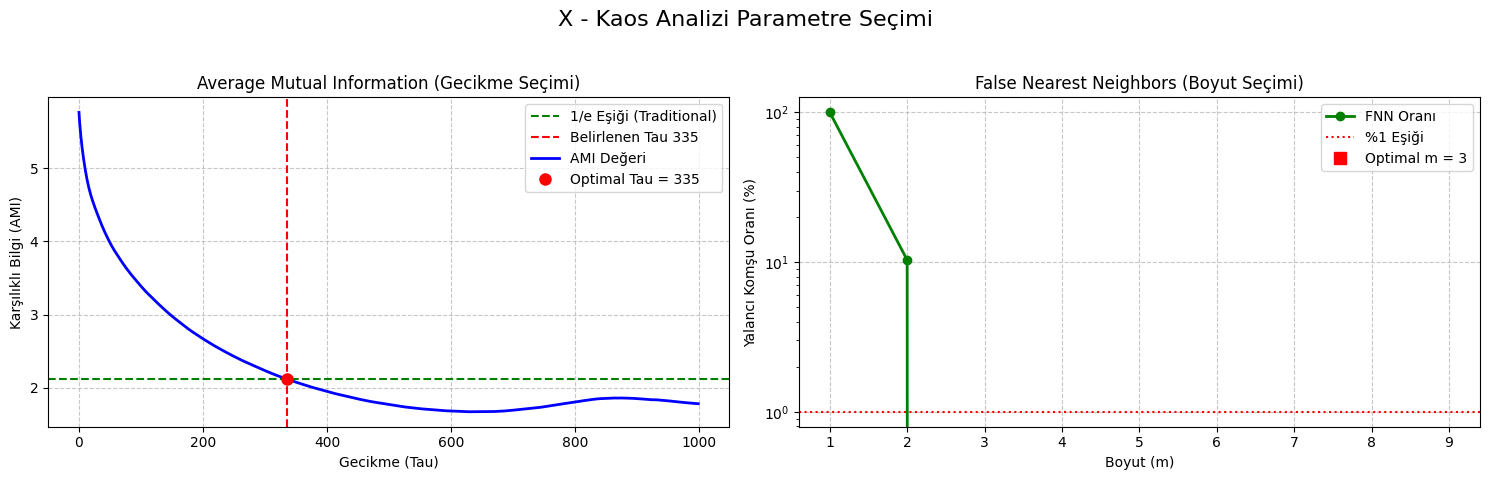

Y için Önerilen Tau (AMI): 318
Y İçin Hesaplanan Optimal Boyut (m): 3
FNN Oranları (f1): [0.9997 0.2468 0.0061 0.     0.     0.     0.     0.     0.    ]


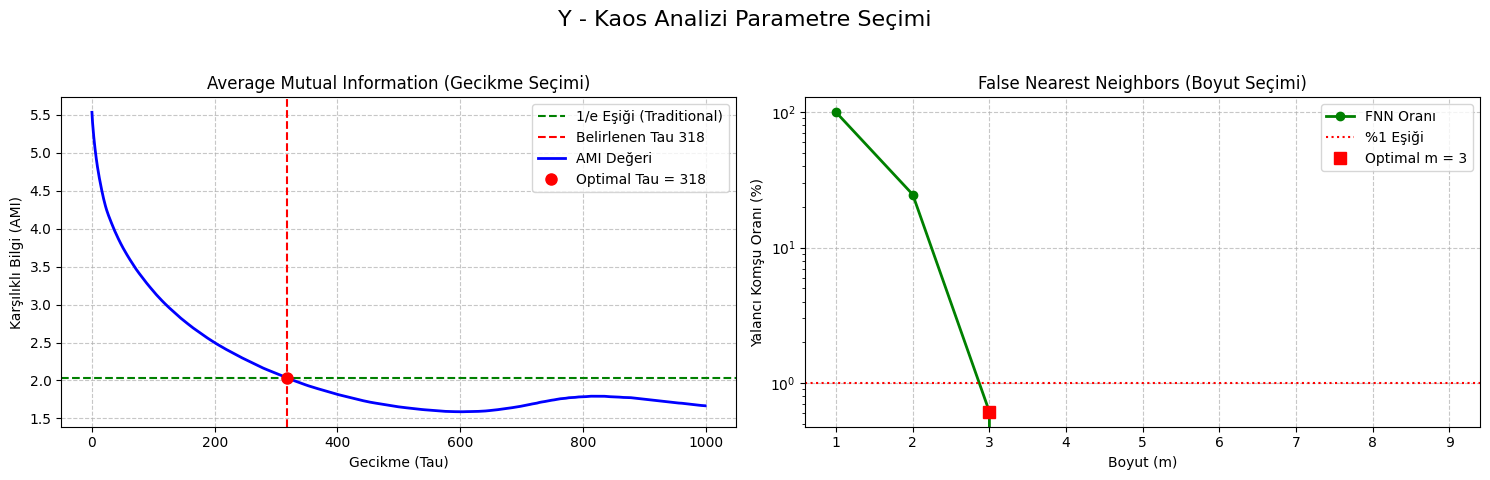

Z için Önerilen Tau (AMI): 252
Z İçin Hesaplanan Optimal Boyut (m): 3
FNN Oranları (f1): [0.9952 0.1076 0.     0.     0.     0.     0.     0.     0.    ]


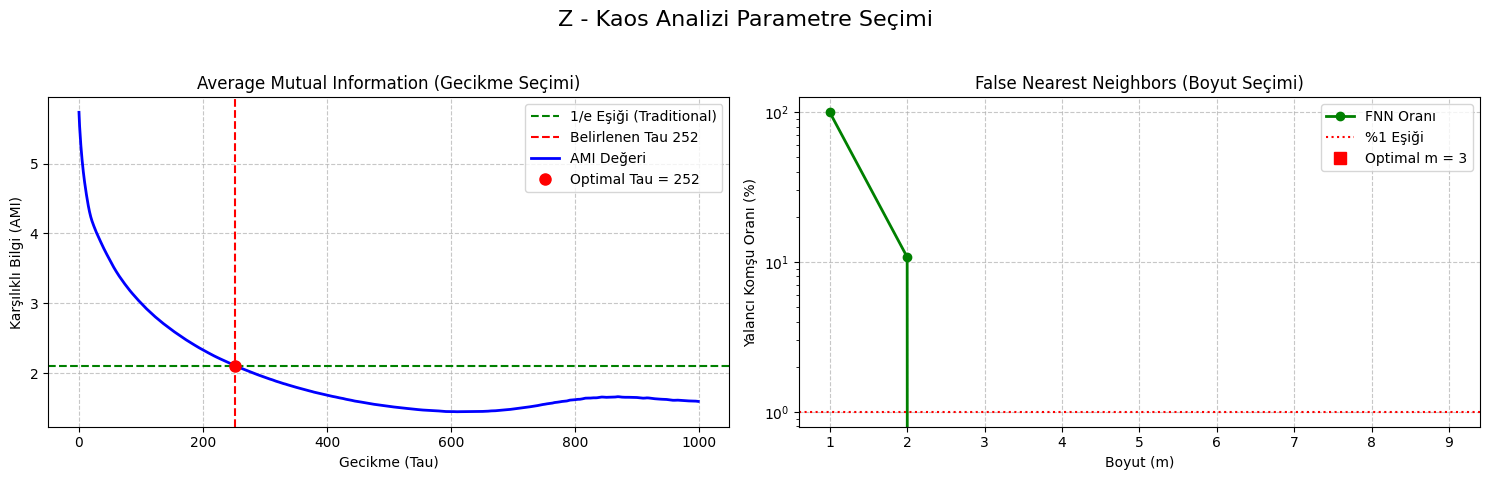

In [68]:
results = {name: {
    'signal': signal,
    'tau': None,
    'm': None,
    'fnn_curve': None
} for name, signal in signals.items()}
for name, signal in signals.items():
    maxtau = 1000
    ami_values = delay.dmi(signal, maxtau=maxtau)
    tau_search = np.arange(maxtau)
    tau_opt = np.where(np.diff(ami_values) > 0)[0][0]

    threshold_tau = ami_values[0] * (1 / np.exp(1))

    # İlk kesişim (üstten alta geçiş)
    idx = np.where(ami_values <= threshold_tau)[0]

    if tau_opt > idx[0]:
        tau_opt = idx[0]


    results[name]['tau'] = tau_opt
    print(f"{name} için Önerilen Tau (AMI): {tau_opt}")

    dims = np.arange(1, 10)
    f1, f2, f3 = dimension.fnn(signal, 
                               tau=tau_opt, 
                               dim=dims, 
                               R=10.0, 
                               A=2.0, 
                               window=50, 
                               metric='euclidean', 
                               parallel=True)
    
    # 4. Optimal m değerini belirleme (%1 eşiği)
    # f1 değerinin 0.01'in altına düştüğü ilk indeksi buluyoruz
    threshold = 0.01
    valid_dims = np.where(f1 < threshold)[0]

    
    
    if len(valid_dims) > 0:
        optimal_m = dims[valid_dims[0]]
    else:
        # Eğer %1 altına düşmüyorsa en düşük değeri veren boyutu al
        optimal_m = dims[np.argmin(f1)]
        print(f"Uyarı: {name} için FNN oranı %1'in altına düşmedi. En düşük değer seçildi.")

    

    print(f"{name} İçin Hesaplanan Optimal Boyut (m): {optimal_m}")
    print(f"FNN Oranları (f1): {np.round(f1, 4)}")
    
    # Sonuçları güncelle
    results[name]['m'] = optimal_m
    results[name]['fnn_curve'] = f1

    

    plot_chaos_parameters(name, signal, tau_search, ami_values, threshold_tau, tau_opt, dims, f1, optimal_m)

In [58]:
threshold = ami_values[0] * (1 / np.exp(1))

# İlk kesişim (üstten alta geçiş)
idx = np.where(ami_values <= threshold)[0]
print(f"İlk kesişim indeksi: {idx[0]}")

İlk kesişim indeksi: 252


In [70]:
from nolitsa import utils

# Örnek: Z verisi için embedding oluşturma
# results['Z']['tau'] ve results['Z']['m'] değerlerini kullandığımızı varsayalım
tau_z = results['Z']['tau']
m_z = results['Z']['m']
signal_z = results['Z']['signal']

# Faz Uzayı Rekonstrüksiyonu
reconstructed_z = utils.reconstruct(signal_z, tau=tau_z, dim=m_z)

# Çıktı Shape: (N - (m-1)*tau, m)
# Yani her bir satır, m-boyutlu bir koordinattır.
print(f"Orijinal veri uzunluğu: {len(signal_z)}")
print(f"Embedding sonrası yapı: {reconstructed_z.shape}")

Orijinal veri uzunluğu: 200000
Embedding sonrası yapı: (199496, 3)


In [60]:
lorenze_df['Z'].head(20)

0     20.000000
1     19.986685
2     19.973366
3     19.960056
4     19.946756
5     19.933466
6     19.920184
7     19.906913
8     19.893650
9     19.880398
10    19.867154
11    19.853920
12    19.840696
13    19.827480
14    19.814275
15    19.801078
16    19.787891
17    19.774714
18    19.761546
19    19.748387
Name: Z, dtype: float64

In [61]:
reconstructed_z[:6]

array([[20.        , 16.92313317, 14.35796188, 12.26853981, 10.72219886,
        10.06800125],
       [19.98668524, 16.91198719, 14.34873105, 12.26123034, 10.71744637,
        10.06827   ],
       [19.97336609, 16.9008492 , 14.3395076 , 12.25392911, 10.71270703,
        10.06856863],
       [19.96005644, 16.88971918, 14.33029153, 12.24663613, 10.70798087,
        10.06889725],
       [19.94675627, 16.87859713, 14.32108284, 12.23935141, 10.70326792,
        10.06925596],
       [19.93346559, 16.86748306, 14.31188151, 12.23207497, 10.69856824,
        10.06964489]])

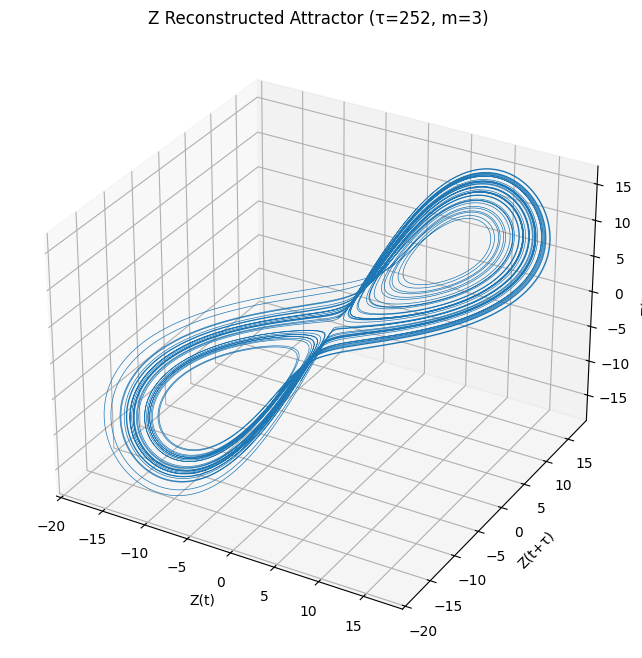

In [71]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# İlk üç boyutu çizdirerek sürekliliği sağla
ax.plot(reconstructed_z[:, 0], reconstructed_z[:, 1], reconstructed_z[:, 2], lw=0.5)
ax.set_xlabel('Z(t)')
ax.set_ylabel('Z(t+τ)')
ax.set_zlabel('Z(t+2τ)')
ax.set_title(f'Z Reconstructed Attractor (τ={tau_z}, m={m_z})')

plt.show()

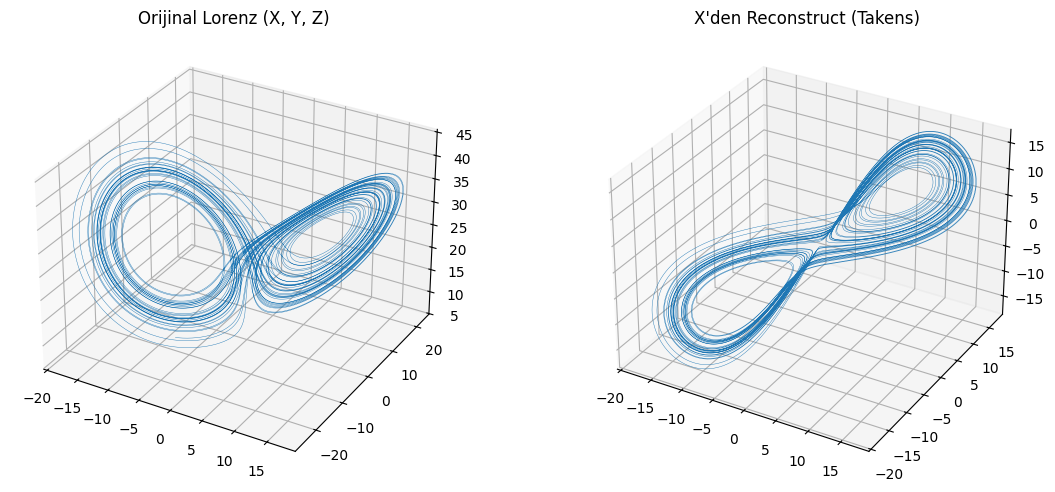

In [75]:
fig = plt.figure(figsize=(12, 5))

# Orijinal 3D Lorenz
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(lorenze_df['X'], lorenze_df['Y'], lorenze_df['Z'], lw=0.3)
ax1.set_title('Orijinal Lorenz (X, Y, Z)')

# Tek değişkenden reconstruct
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(reconstructed_z[:, 0], reconstructed_z[:, 1], reconstructed_z[:, 2], lw=0.3)
ax2.set_title('X\'den Reconstruct (Takens)')

plt.tight_layout()
plt.show()

# Dynamics

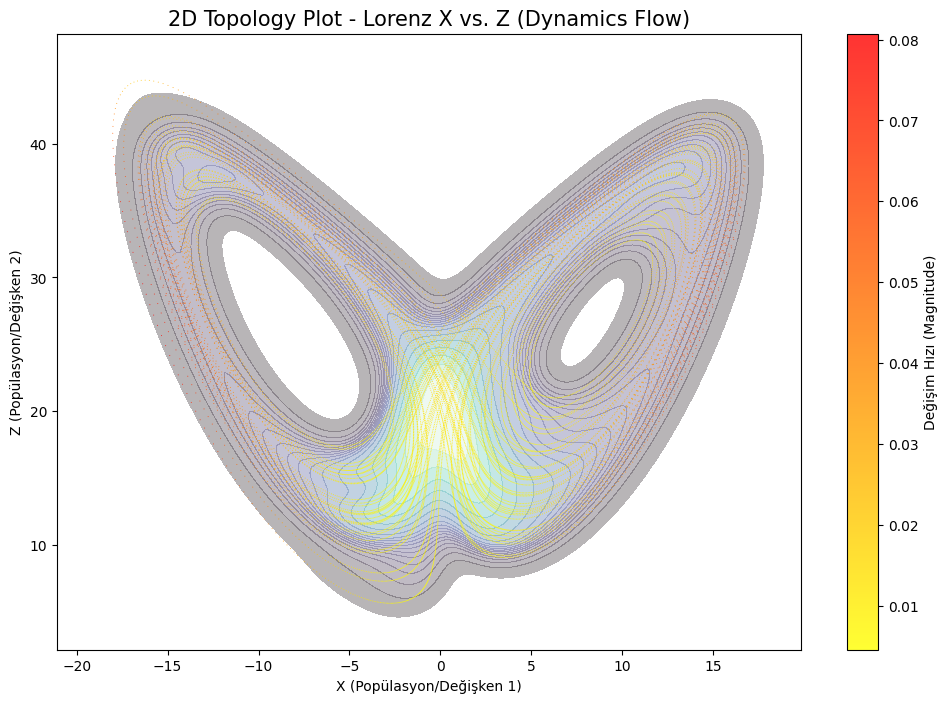

In [22]:
# Veri Hazırlığı (Z ve X seçimi)
df = lorenze_df[['X', 'Z']].copy() # X'i yatay, Z'yi dikey eksen yapalım

# Değişim hızlarını hesapla
df['X_change'] = (df['X'].shift(-1) - df['X'].shift(1)) / 2
df['Z_change'] = (df['Z'].shift(-1) - df['Z'].shift(1)) / 2
plot_df = df.dropna().iloc[::10] # Her 10 noktada bir örnekle (Grafiğin boğulmaması için)

plt.figure(figsize=(12, 8))

# 1. Yoğunluk Haritası (KDE)
sns.kdeplot(
    data=df, x='X', y='Z', 
    fill=True, levels=20, thresh=0.02, cmap="mako", alpha=0.3
)

# 2. Vektör Alanı (Quiver)
# color parametresini değişim hızına (hıza) göre renklendirebiliriz
speed = np.sqrt(plot_df['X_change']**2 + plot_df['Z_change']**2)
quiv = plt.quiver(
    plot_df['X'], plot_df['Z'], 
    plot_df['X_change'], plot_df['Z_change'],
    speed, cmap='autumn_r', alpha=0.8, 
    scale_units='xy', angles='xy', scale=10, # Ölçeği ihtiyaca göre ayarla
    width=0.0015, headwidth=4
)

# 3. Estetik Detaylar
plt.colorbar(quiv, label='Değişim Hızı (Magnitude)')
plt.title('2D Topology Plot - Lorenz X vs. Z (Dynamics Flow)', fontsize=15)
plt.xlabel('X (Popülasyon/Değişken 1)')
plt.ylabel('Z (Popülasyon/Değişken 2)')
#plt.style.use('dark_background') # Kaotik sistemler koyu temada daha net görünür
plt.grid(False)

plt.show()

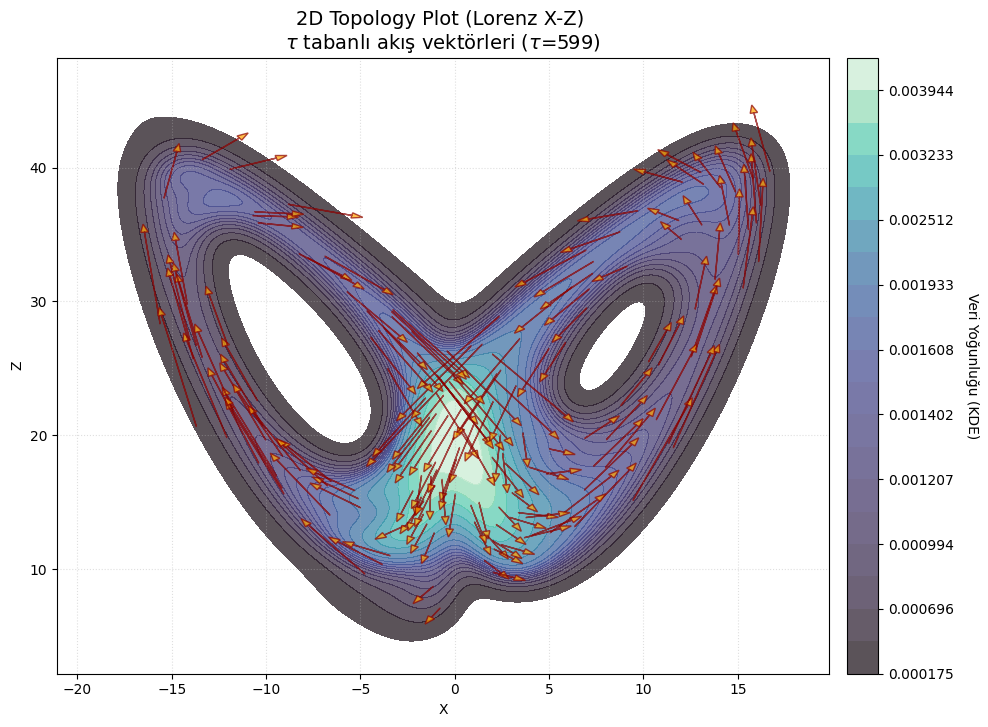

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Veri Hazırlığı
df = lorenze_df[['X', 'Z']].copy()
# Daha önce hesapladığın tau değerini kullanıyoruz
tau = results['Z']['tau'] 

# Değişimi Tau adımına göre hesapla (Merkezi fark: t+tau ve t-tau arasındaki fark)
df['X_change'] = (df['X'].shift(-tau) - df['X'].shift(tau)) / (2 * tau)
df['Z_change'] = (df['Z'].shift(-tau) - df['Z'].shift(tau)) / (2 * tau)

# Örnekleme: Grafiğin okunabilirliği için her (tau * 2) adımda bir ok çizmek iyi bir kuraldır
plot_df = df.dropna().iloc[::(tau * 2)]

plt.figure(figsize=(12, 8))
scale = 0.5
# 2. Yoğunluk Haritası
ax = plt.gca()
kde = sns.kdeplot(data=df, x='X', y='Z', fill=True, levels=20, thresh=0.02, cmap="mako", alpha=0.7, ax=ax)
mappable = kde.collections[0]

# ✅ GERÇEK yoğunluk colorbar
cbar = plt.colorbar(mappable, ax=ax, pad=0.02)
cbar.set_label('Veri Yoğunluğu (KDE)', rotation=270, labelpad=18)

# 3. Arrow Çizimi
ax = plt.gca()
for i in range(len(plot_df)):
    row = plot_df.iloc[i]
    # Vektör boylarını görsel olarak optimize etmek için tau ile çarpabilirsin 
    # veya olduğu gibi bırakabilirsin
    ax.arrow(
        row['X'], row['Z'], 
        row['X_change'] * tau * scale, row['Z_change'] * tau * scale, 
        head_width=0.4, head_length=0.6, fc='orange', ec='darkred', alpha=0.7,
        length_includes_head=True
    )

plt.title(f'2D Topology Plot (Lorenz X-Z) \n$\\tau$ tabanlı akış vektörleri ($\\tau$={tau})', fontsize=14)
plt.xlabel('X')
plt.ylabel('Z')
plt.grid(True, linestyle=':', alpha=0.4)

plt.show()